***
# Data Visualisation
1. Produce data visualisations for
    i. Number of establishments by violation type
    ii. Number of establishments by number of violations
    iii. Number of establishments by geography
***

In [1]:
import toml
import os
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np

In [2]:
#Set Pandas options
pd.set_option('display.max_columns', None)

In [3]:
#Import all plot functions
from plot_by_num_of_violations import plot_by_num_of_violations
from plot_by_violation_type import plot_by_violation_type
from plot_by_zip_code import plot_by_zip_code
from plot_geography import plot_geography

In [4]:
#get current working directory
curr_dir = os.getcwd()
print(curr_dir)

C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment\visualisation


In [5]:
#Get directory for database operations to import create_df_from_sql function 
os.chdir('..\database_operations')

In [6]:
#import database functions
from create_df_from_sql_function import create_df_from_sql

In [7]:
#change working directory to parent directory to import configs.
os.chdir('..')
wdir = os.getcwd()
print(wdir)

C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment


In [8]:
config = toml.load(wdir + "\config.toml")
print (config)

{'postgres_credentials': {'username': 'postgres', 'password': 'admin', 'host': '127.0.0.1', 'port': '5432'}, 'db_details': {'dbname': 'inspections_db', 'inspections_table': 'inspections', 'violations_table': 'violations', 'violations_agg_table': 'violations_aggregated', 'inspections_enriched_table': 'inspections_enriched', 'inspections_cleaned_table': 'inspections_cleaned', 'zip_statistics_table': 'statistics_zip_code', 'seating_type_statistics_table': 'statistics_seating_type', 'seating_capacity_statistics_table': 'statistics_seating_capacity', 'viz_violation_type': 'viz_violation_type', 'viz_num_violations': 'viz_num_violations', 'viz_geography': 'viz_geography', 'viz_zip_code': 'viz_zip_code'}}


In [9]:
os.chdir(curr_dir)

For Visualisation by type of violation

In [10]:
#Using create_df_from_sql function create the pandas dataframe for visualisation by violation type .
print("Loading cleaned aggregated data by violation type from database.")
violation_type = create_df_from_sql(config['postgres_credentials'],\
                                 config['db_details']['dbname'],\
                                 config['db_details']['viz_violation_type'])
print("Aggregated data by violation type load completed.")

Loading cleaned aggregated data by violation type from database.
Aggregated data by violation type load completed.


In [11]:
violation_type.head(5)

,activity_yr,violation_type,number_of_facilities
0,2016,Cabinets: approved,1
1,2016,Shelving,1
2,2016,"maintained clean and in good repai""",1
3,2016,"""Equipment",1
4,2016,"""Floor maintained clea""",2


In [12]:
yr=2018
sub_df = violation_type[violation_type['activity_yr'] == yr][['violation_type', 'number_of_facilities']]\
.sort_values('number_of_facilities', ascending=False)\
.head(30)

In [13]:
sub_df.head(5)

,violation_type,number_of_facilities
201,44,20947
190,33,20313
192,35,17419
197,40,12688
193,36,12547


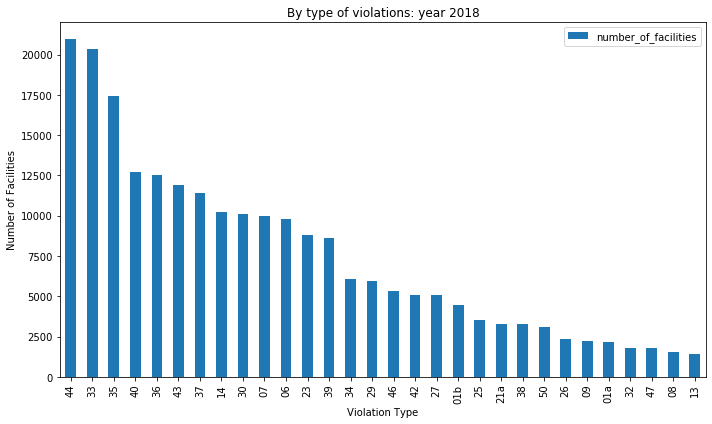

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sub_df[['violation_type', 'number_of_facilities']].plot(x='violation_type', kind='bar', ax=ax)
plt.xlabel('Violation Type')
plt.ylabel('Number of Facilities')
ax.set_title('By type of violations: year {}'.format(yr))
fig.tight_layout()

## For visualisation by number of violation

In [16]:
#Using create_df_from_sql function create the pandas dataframe for visualisation by number of violations .
print("Loading cleaned aggregated data by number of violations from database.")
violation_num = create_df_from_sql(config['postgres_credentials'],\
                                 config['db_details']['dbname'],\
                                 config['db_details']['viz_num_violations'])
print("Aggregated data by number of violations load completed.")

Loading cleaned aggregated data by number of violations from database.
Aggregated data by number of violations load completed.


In [17]:
violation_num.head(5)

,activity_yr,num_violations,num_facility
0,2016,1,1078
1,2016,2,2041
2,2016,3,2635
3,2016,4,2857
4,2016,5,2736


In [18]:
yr=2018
sub_df = violation_num[violation_num['activity_yr'] == yr][['num_violations', 'num_facility']]\
.sort_values('num_facility', ascending=False)\
.head(30)

In [19]:
sub_df.head(5)

,num_violations,num_facility
44,4,9534
45,5,9162
43,3,8742
46,6,7962
42,2,6519


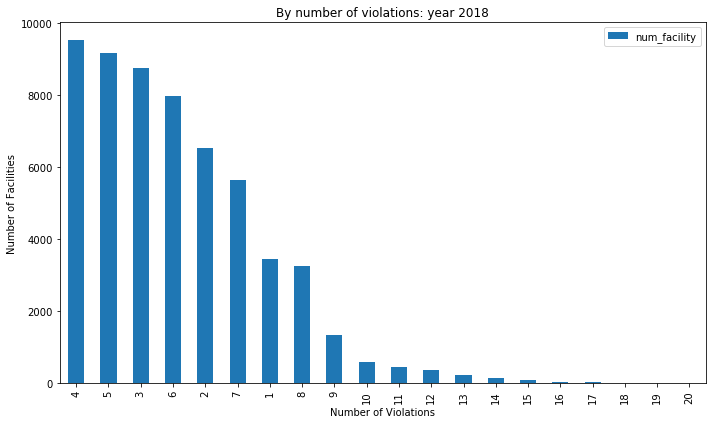

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sub_df[['num_violations', 'num_facility']].plot(x='num_violations', kind='bar', ax=ax)
plt.xlabel('Number of Violations')
plt.ylabel('Number of Facilities')
ax.set_title('By number of violations: year {}'.format(yr))
fig.tight_layout()

## For visualisation by Zip Code

In [22]:
#Using create_df_from_sql function create the pandas dataframe for visualisation by number of violations .
print("Loading cleaned aggregated data for violations by zip code from database.")
violation_zip = create_df_from_sql(config['postgres_credentials'],\
                                 config['db_details']['dbname'],\
                                 config['db_details']['viz_zip_code'])
print("Aggregated data by for violations by zip code load completed.")

Loading cleaned aggregated data for violations by zip code from database.
Aggregated data by for violations by zip code load completed.


In [23]:
violation_zip.head(5)

,activity_yr,zip_code,num_facilities,avg_violation_per_facility
0,2016,2443,22,6.045455
1,2016,2445,83,4.216867
2,2016,2447,147,4.557823
3,2016,2451,24,3.916667
4,2016,2832,54,4.722222


In [24]:
yr=2018
sub_df = violation_zip[violation_zip['activity_yr'] == yr][['zip_code', 'avg_violation_per_facility', 'num_facilities']]\
.sort_values('avg_violation_per_facility', ascending=False)\
.head(30)

In [25]:
sub_df.head(5)

,zip_code,avg_violation_per_facility,num_facilities
805,26325,10.084507,71
578,3700,8.597701,87
579,4012,8.000000,1
563,3335,7.316940,183
785,25715,6.713881,353


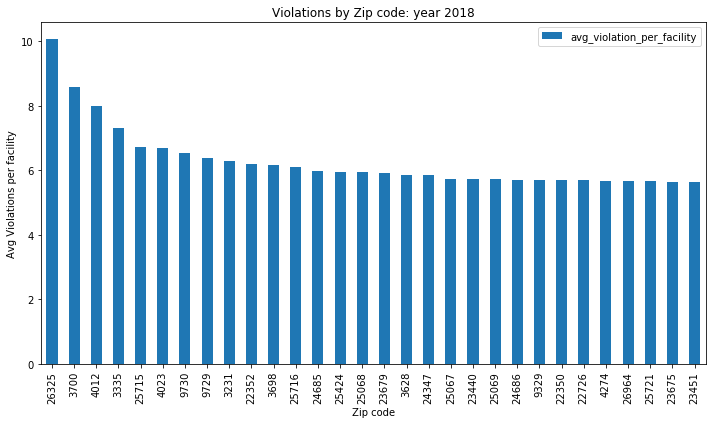

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sub_df[['zip_code', 'avg_violation_per_facility']].plot(x='zip_code', kind='bar', ax=ax)
plt.xlabel('Zip code')
plt.ylabel('Avg Violations per facility')
ax.set_title('Violations by Zip code: year {}'.format(yr))
fig.tight_layout()

Geographical visualisation

In [27]:
#Using create_df_from_sql function create the pandas dataframe for visualisation by number of violations .
print("Loading aggregated data for lat/long from database.")
geo = create_df_from_sql(config['postgres_credentials'],\
                                 config['db_details']['dbname'],\
                                 config['db_details']['viz_geography'])
print("Aggregated data for lat/long load completed.")

Loading aggregated data for lat/long from database.
Aggregated data for lat/long load completed.


In [28]:
geo.head(5)

,activity_yr,location_lat,location_long,num_facilities,avg_violation_per_facility
0,2016,33.340539,-118.328636,1,12.0
1,2016,33.341054,-118.323570,1,8.0
2,2016,33.342610,-118.324732,1,9.0
3,2016,33.342759,-118.323823,1,10.0
4,2016,33.342763,-118.325804,1,10.0


In [29]:
sub_df = geo[geo['activity_yr'] == yr]

In [30]:
sub_df.head(5)

,activity_yr,location_lat,location_long,num_facilities,avg_violation_per_facility
36581,2018,33.340539,-118.328636,2,17.5
36582,2018,33.340932,-118.332570,2,5.5
36583,2018,33.341054,-118.323570,2,8.0
36584,2018,33.342610,-118.324732,2,15.5
36585,2018,33.342759,-118.323823,2,14.0


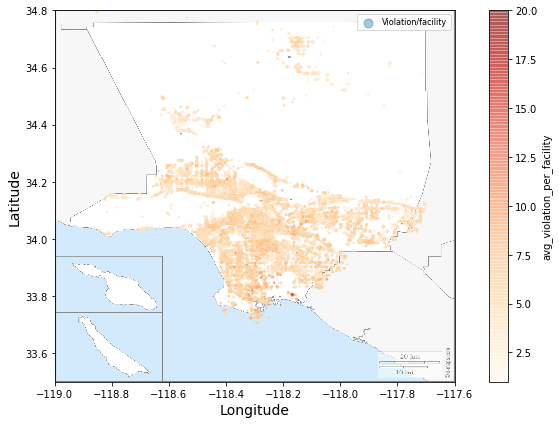

In [31]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(1, 1, figsize=(10,6))
california_img=mpimg.imread('losangeles.gif')
sub_df.plot(kind="scatter", x="location_long", y="location_lat", figsize=(10,6),
                       s=sub_df['num_facilities'], label="Violation/facility",
                       c="avg_violation_per_facility", cmap=plt.get_cmap("OrRd"),
                       colorbar=True, alpha=0.4, ax =ax
                      )
plt.imshow(california_img, extent=[-119, -117.6, 33.5, 34.8], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend(fontsize=8)
fig.tight_layout()

***
Test Visualisation Functions
***

current directory is :C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment\visualisation
Loading cleaned aggregated data by number of violations from database.
Aggregated data by number of violations load completed.


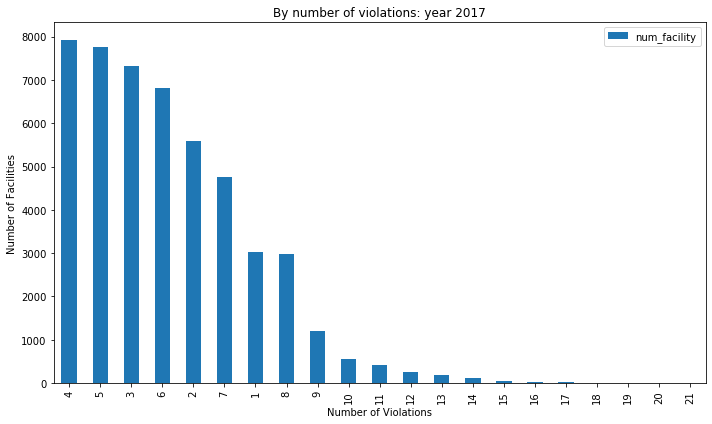

In [32]:
fig = plot_by_num_of_violations(2017)

current directory is :C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment\database_operations
Loading cleaned aggregated data by violation type from database.
Aggregated data by violation type load completed.


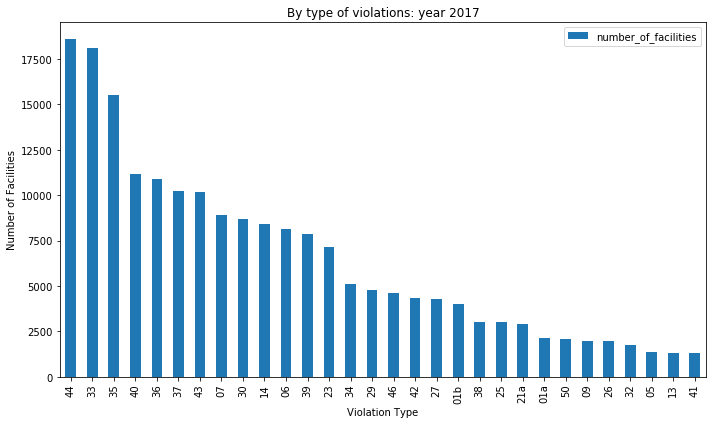

In [33]:
fig1 = plot_by_violation_type(2017)

current directory is :C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment\database_operations
Loading cleaned aggregated data for violations by zip code from database.
Aggregated data by for violations by zip code load completed.


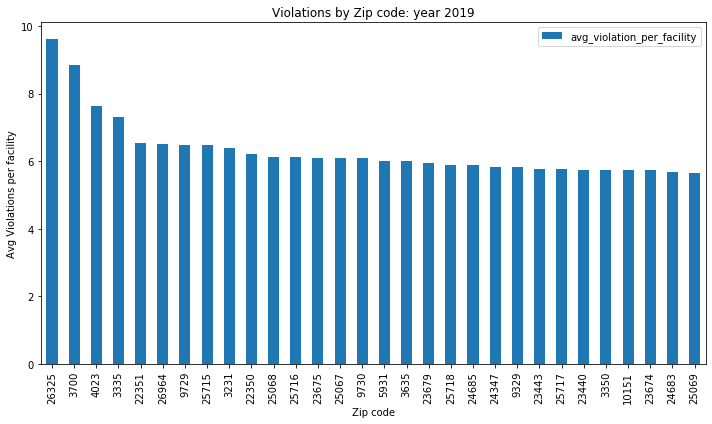

In [34]:
fig2 = plot_by_zip_code(2019)

current directory is :C:\Users\guest1\MSc_Advanced_Programming\advanced-programming-assessment\visualisation
Loading aggregated data for lat/long from database.
Aggregated data for lat/long load completed.


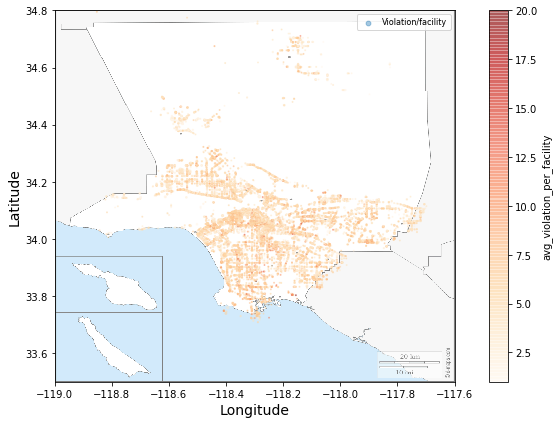

In [10]:
fig2 = plot_geography(2019)

In [12]:
type(fig2)

matplotlib.figure.Figure